<a href="https://colab.research.google.com/github/panrosk/fastaipractice/blob/master/Fast_Ai_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrar en Kaggle



In [0]:
!pip install --upgrade --force-reinstall --no-deps kaggle

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"oscarfuentes","key":"2781c238f1c63047147243dbd0c21e97"}

   
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json


!kaggle competitions download plant-pathology-2020-fgvc7

     |████████████████████████████████| 61kB 2.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=3aefaf724117f5b83828c6afc4b8c86799c1e634f87c6971cb2230c00f2270e6
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6
 98% 761M/779M [00:13<00:00, 88.0MB/s]
100% 779M/779M [00:13<00:00, 59.5MB/s]


Unzip Files

In [0]:
!apt install unzip
!unzip /content/plant-pathology-2020-fgvc7.zip

Inspect Files


In [0]:
import pandas as pd 

data = pd.read_csv('/content/train.csv')
print(data.columns)
labels = []
names = []
for index, row in data.iterrows():
  names.append('images/'+row[0]+'.jpg')
  if row[1]==1:
    labels.append('healthy')
  elif row[2]==1:
    labels.append('multiple_diseases')
  elif row[3]==1:
    labels.append('rust')
  elif row[4]==1:
    labels.append('scab')

DfforImageDataBunch = pd.DataFrame(list(zip(names, labels)), 
               columns =['Name', 'label'])



Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


Get all from Fast Ai

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

Get Databunch

In [0]:
tfms = get_transforms(do_flip=False)
DataModel = ImageDataBunch.from_df(path='/content',df=DfforImageDataBunch,ds_tfms=tfms, size=224)

Ver imagenes 


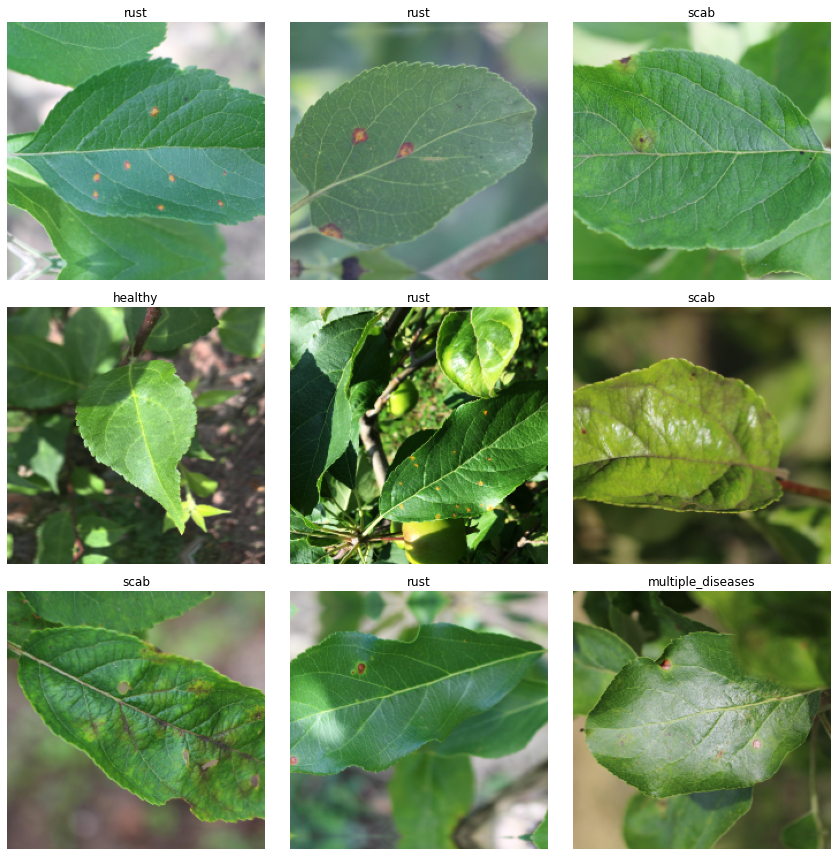

In [0]:
DataModel.show_batch(rows=3)

Train the MODELBABY

In [0]:
learn = cnn_learner(DataModel, models.densenet121, metrics=error_rate)
learn.fit_one_cycle(4)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.156152,0.653031,0.192308,02:03
1,0.759392,0.510826,0.148352,02:01
2,0.569810,0.448931,0.145604,02:02
3,0.447153,0.425598,0.137363,02:02


Lets see some learning rates

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


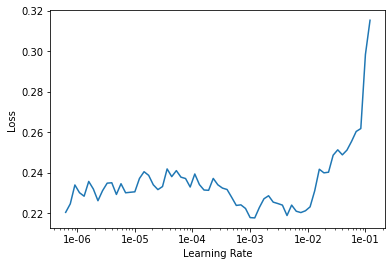

In [0]:
lr_find(learn)
learn.recorder.plot()

change learning rate 


In [0]:
lr=2e-3

run it again

In [0]:
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.250399,0.414487,0.140110,02:00
1,0.224644,0.420904,0.129121,02:00
2,0.213856,0.422944,0.129121,02:00
3,0.201192,0.404135,0.112637,02:00
4,0.186929,0.376035,0.115385,02:00
5,0.160051,0.370803,0.115385,02:00


okay this one wont beat anyone so lets look for a different

In [0]:
learn.save('laprimerita')

Otro modelo a ver q tal broki 


In [0]:
DataModel.c

4

In [0]:
learn = cnn_learner(DataModel, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.037676,1.174606,0.252747,02:02
1,0.808475,0.600161,0.164835,02:02
2,0.600276,0.504664,0.162088,02:03
3,0.472359,0.482721,0.151099,02:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


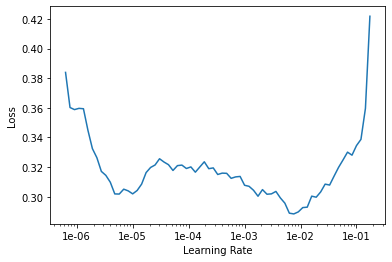

In [0]:
lr_find(learn)
learn.recorder.plot()